# Prueba técnica científico de datos

Harry Vargas Rodríguez

email: vargasrodriguezharry@gmail.com

cel: 3183242359

**Objetivo**

Predecir si el cliente aceptará una tarjeta de crédito.

**Preguntas de negocio**

* ¿Cuál es el 20% de clientes con mayor probabilidad de adquirir una tarjeta de crédito?

* ¿Cuales son las características de los clientes con esa alta probabilidad de aceptar una tarjeta de crédito?

**Acciones posibles cómo resultado**

Aumentar la tasa de conversión de clientes a través de las campañas telefónicas , optimizando costos y recursos del personal del área de marketing

**Entregables**

* 3 modelos entrenados. 
* Comparativa de los modelos. 
* Datasets procesados
* Insights entregados por los modelos y recomendaciones.

**Descripción de fuentes de datos** 

Datos de los clientes demográficos, sociales, financieros, negocio. Datos de entrada, 2 datasets:
* train
* test

## Importar librerías

In [ ]:
!pip install -U sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
import numpy as np
from numpy import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time


%matplotlib inline
sns.set()
sns.set_palette('crest')

In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.7.13
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Scikit-learn 1.0.2


Este proyecto fue realizado con las siguientes versiones de las librerías:

Python 3.7.13

NumPy 1.21.6

Pandas 1.3.5

Matplotlib 3.2.2

Scikit-learn 1.0.2

## Carga de archivos



In [ ]:
train = pd.read_csv('https://github.com/HarryVargas96/Bank-product-opening/blob/main/train.csv?raw=true').drop(columns = ['ID'])

# Definición nombres de variables
nombres = ['edad','trabajo','estado_civil','educacion','mora','vivienda','consumo','contacto','mes','dia','campana','dias_ultima_camp','no_contactos','resultado_anterior','emp_var_rate','cons_price_idx','cons_conf_idx','euriobor3m','nr_employed','y']
train.columns = nombres

# Definición de columnas tipo categories
train = train.astype( dtype = {'trabajo':'category','estado_civil':'category','educacion':'category','mora':'category','vivienda':'category','consumo':'category','contacto':'category','mes':'category','dia':'category','resultado_anterior':'category'})


print(train.shape)
pd.options.display.max_columns = 21
train.head()

(23099, 20)


,edad,trabajo,estado_civil,educacion,mora,vivienda,consumo,contacto,mes,dia,campana,dias_ultima_camp,no_contactos,resultado_anterior,emp_var_rate,cons_price_idx,cons_conf_idx,euriobor3m,nr_employed,y
0,57,servicios,casado,bachillerato,unknown,no,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0
1,37,servicios,casado,bachillerato,no,si,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0
2,40,administrador negocio,casado,primaria,no,no,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0
3,56,servicios,casado,bachillerato,no,no,si,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0
4,25,servicios,single,bachillerato,no,si,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0


In [ ]:
# test = pd.read_csv('test.csv')
# print(test.shape)

# grupo de prueba, sin datos de la variable objetivo

## Entendimiento de los datos

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23099 entries, 0 to 23098
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   edad                23099 non-null  int64   
 1   trabajo             23099 non-null  category
 2   estado_civil        23099 non-null  category
 3   educacion           23099 non-null  category
 4   mora                23099 non-null  category
 5   vivienda            23099 non-null  category
 6   consumo             23099 non-null  category
 7   contacto            23099 non-null  category
 8   mes                 23099 non-null  category
 9   dia                 23099 non-null  category
 10  campana             23099 non-null  int64   
 11  dias_ultima_camp    23099 non-null  int64   
 12  no_contactos        23099 non-null  int64   
 13  resultado_anterior  23099 non-null  category
 14  emp_var_rate        23099 non-null  float64 
 15  cons_price_idx      23099 non-null  

## Detección

|Nombre de la variable|Descripción|Tipología estadística|Tipología computacional|
|---|---|---|---|
|id|Identificador del contacto|Cualitativa|int|
|edad|Edad del cliente en años|Cuantitativa|int|
|trabajo|Tipo de trabajo|Cualitativa ordinal|category|
|estado_civil|Estado civil|Cualitativa|category|
|educacion|Nivel educativo|Cualitativa ordinal|category|
|mora|Posee crédito en mora|Cualitativa|category
|vivienda|Tiene crédito hipotecario|Cualitativa|category
|consumo|Tiene crédito|Cualitativa|category
|contacto|tipo de contacto|Cualitativa|Object
|mes|Mes del último contacto|Cualitativa|category
|dia|Día de la semana del último contacto|Cualitativa|category
|campana|numero de contactos realizados durante esta campaña para este cliente|Cuantitativa|int
|dias_ultima_camp|número de días que pasaron desde el último contacto|Cuantitativa|int
|no_contactos||Cuantitativa|int
|resultado_anterior|Resultado del último contacto|Cualitativa|category
|emp_var_rate|tasa de variación del empleo||float
|cons_price_idx|índice de precios al consumidor - indicador mensual|Cuantitativa|float
|cons_conf_idx|índice de confianza del consumidor - indicador mensual|Cuantitativa|float
|euribor3m|índice tasa euribor 3 meses|Cuantitativa|float
|nr_employed|número de empleados, indicador trimestral |Cuantitativa|float
|y|Aceptación de una tarjeta de crédito|Cualitativa binaria|category

## Resumen estadístico

In [ ]:
train.describe()

,edad,campana,dias_ultima_camp,no_contactos,emp_var_rate,cons_price_idx,cons_conf_idx,euriobor3m,nr_employed,y
count,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000
mean,40.067665,2.560154,962.976060,0.171003,0.095649,85576.471847,-40.485237,3190.939789,5167.329439,0.112126
std,10.449983,2.756954,185.675409,0.494079,1.565650,26224.436234,4.629643,2088.703058,72.260805,0.315528
min,18.000000,1.000000,0.000000,0.000000,-3.400000,93.200000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,92893.000000,-42.700000,1281.000000,5099.100000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93876.000000,-41.800000,4856.000000,5191.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93994.000000,-36.400000,4961.000000,5228.100000,0.000000
max,95.000000,42.000000,999.000000,6.000000,1.400000,94767.000000,-26.900000,5045.000000,5228.100000,1.000000


In [ ]:
train.describe(include = 'category')

,trabajo,estado_civil,educacion,mora,vivienda,consumo,contacto,mes,dia,resultado_anterior
count,23099,23099,23099,23099,23099,23099,23099,23099,23099,23099
unique,12,6,8,3,3,3,2,10,5,3
top,administrador negocio,casado,pregrado,no,si,no,celular,may,thu,sin contacto
freq,5820,13965,6756,18331,12136,19062,14611,7758,4780,19992


Los datos no contienen valores nulos

In [ ]:
train.isnull().sum()

edad                  0
trabajo               0
estado_civil          0
educacion             0
mora                  0
vivienda              0
consumo               0
contacto              0
mes                   0
dia                   0
campana               0
dias_ultima_camp      0
no_contactos          0
resultado_anterior    0
emp_var_rate          0
cons_price_idx        0
cons_conf_idx         0
euriobor3m            0
nr_employed           0
y                     0
dtype: int64

## Limpieza

Se hizo una primera iteración de exploración y visualización donde se encontraron algunos problemas en los datos, a continuación se listan junto con la solución empleada.

* Aparecen etiquetas repetidas en la variable estado_civil: divorced, divorciado, single, soltero.
* El 96% de los datos para la variable dias_ultima_camp toma la etiqueta 999 la cual significa que el cliente nunca ha sido contactado, convertir a categórica, ha sido (1) o no ha sido o contactado antes (0).
* El índice de precios al consumidor está tomando un valor fuera de rango de 93.2. Considerando que se trata de un índice temporal, que se caracteriza por la continuidad de su dominio se decide reemplazar el valor de 93.2 por 93200 que es el valor con sentido según el entendimiento de la variable

**Transformación**

Para la fase de transformación se debe:
* Estandarizar variables numéricas
* Usar codificación dummy para variables categóricas

In [ ]:
# mapear etiqueta divorced por divorciado
#mapear etiqueta single por soltero

train['estado_civil'] = train['estado_civil'].map(lambda x: 'divorciado' if x == 'divorced' else x).astype('category')
train['estado_civil'] = train['estado_civil'].map(lambda x: 'soltero' if x == 'single' else x).astype('category')

In [ ]:
# Discretizar variable dias_ultima_camp
# Eliminar variable dias_ultima_camp

train['contacto_previo'] =  train['dias_ultima_camp'].map(lambda x: 0.0 if x == 999 else 1.0).astype('category')
train.drop(columns = 'dias_ultima_camp',inplace = True)


In [ ]:
# Transformar valor atípico del precio del índice del consumidor

train.loc[train['cons_price_idx'] == 93.2,'cons_price_idx'] = 93200

## Análisis univariado

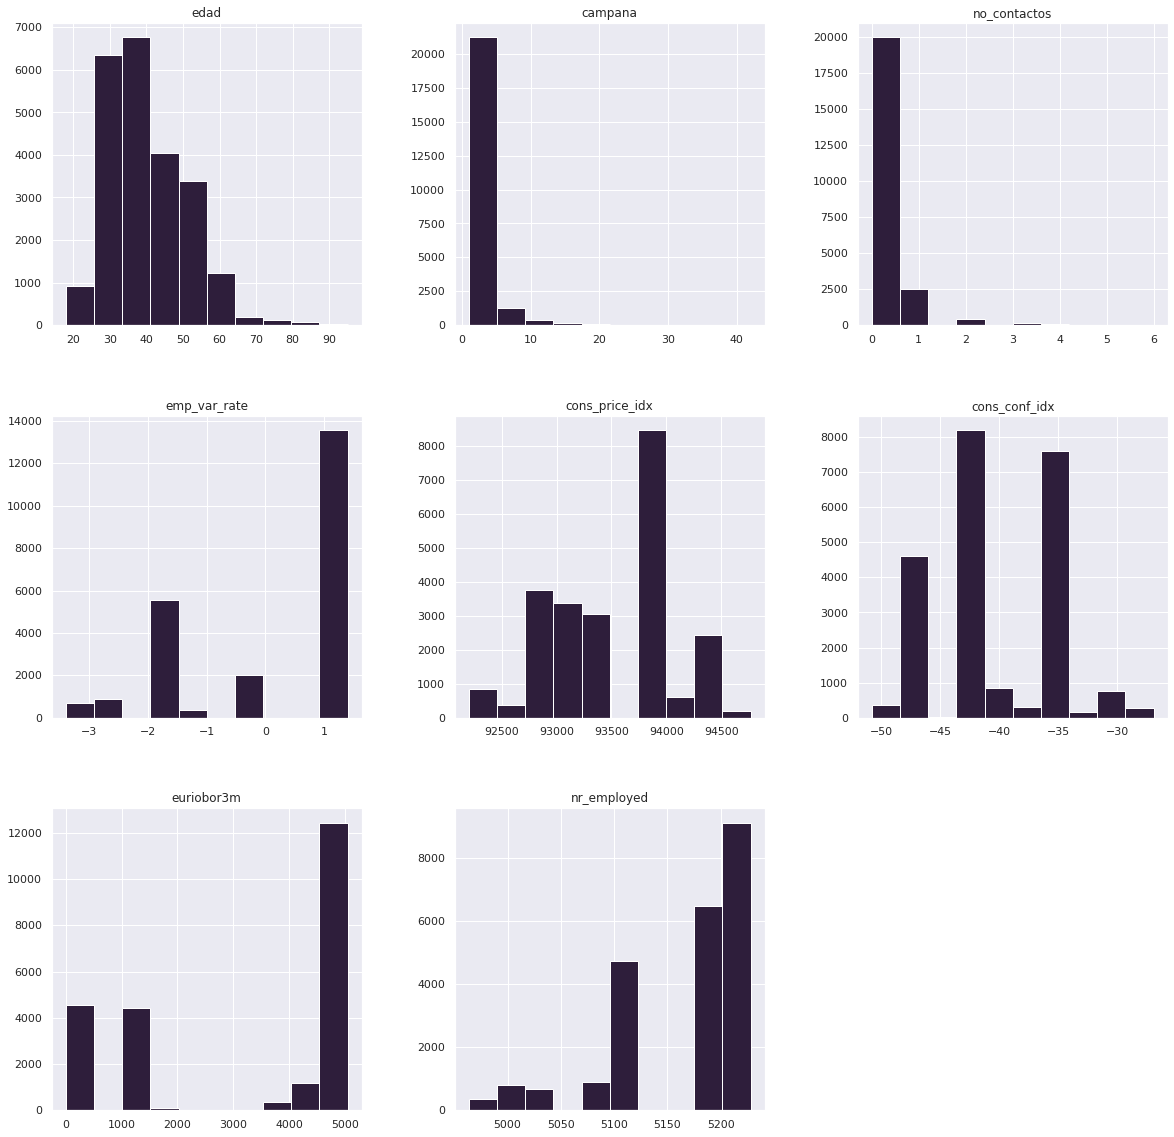

In [120]:
numericas = ['edad','campana','no_contactos','emp_var_rate','cons_price_idx','cons_conf_idx','euriobor3m','nr_employed']

train.hist(column = numericas, figsize=(20,20))
plt.show()

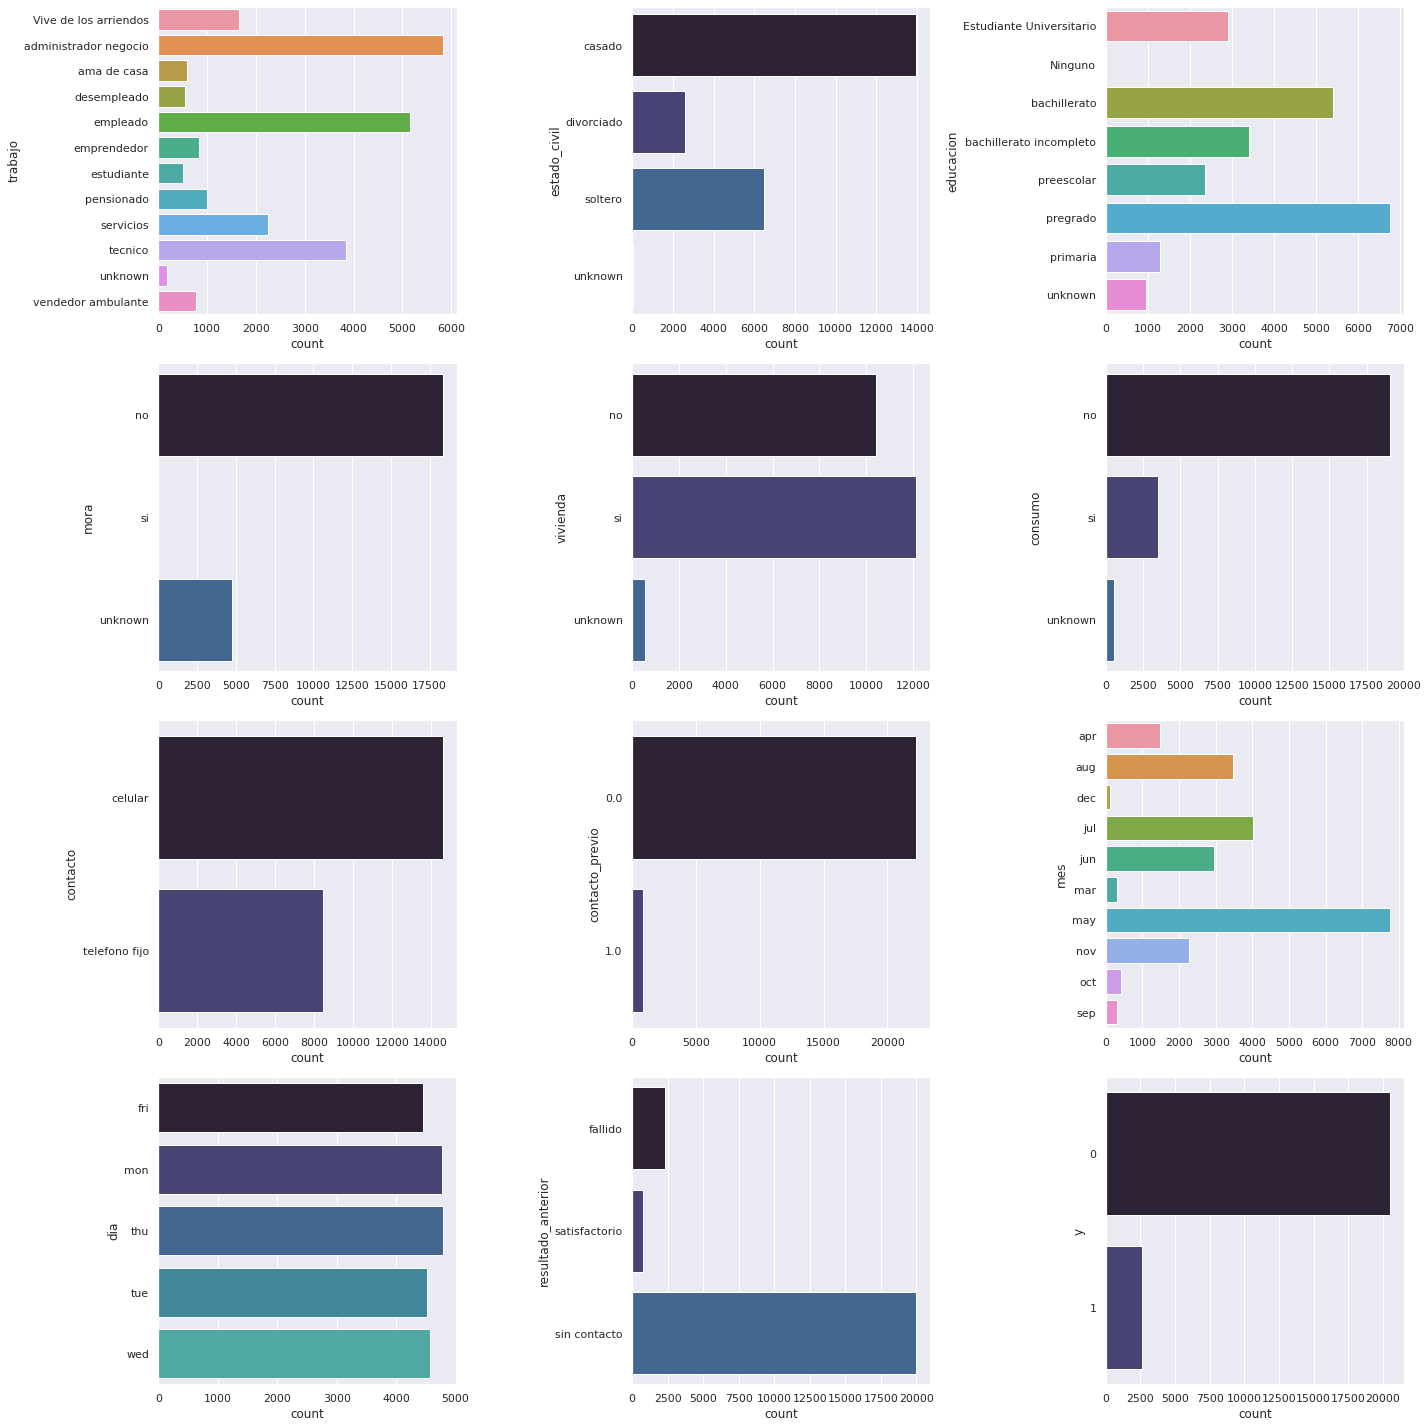

In [123]:
categoricas = ['trabajo','estado_civil','educacion','mora','vivienda','consumo','contacto','contacto_previo','mes','dia','resultado_anterior','y']

fig, ax = plt.subplots(4,3, figsize=(20,20))
k = 0

for i in range(4):
    for j in range(3):
            sns.countplot(y = train[categoricas[k]], ax = ax[i][j])
            k += 1
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribución de la edad')

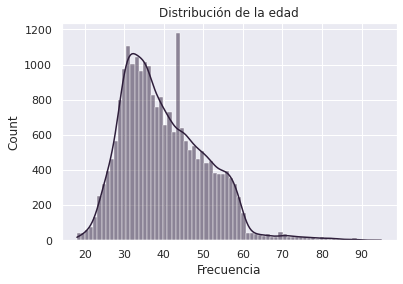

In [122]:
sns.histplot(train['edad'], kde = True)
plt.xlabel('Edad en años')
plt.xlabel('Frecuencia')
plt.title('Distribución de la edad')

In [112]:
train['resultado_anterior'].value_counts(normalize = True)

sin contacto     0.865492
fallido          0.101303
satisfactorio    0.033205
Name: resultado_anterior, dtype: float64

In [110]:
train['educacion'].value_counts(normalize = True)

pregrado                    0.292480
bachillerato                0.234166
bachillerato incompleto     0.147149
Estudiante Universitario    0.125979
preescolar                  0.102169
primaria                    0.056193
unknown                     0.041474
Ninguno                     0.000390
Name: educacion, dtype: float64

In [130]:
train['educacion'].value_counts().index

CategoricalIndex(['pregrado', 'bachillerato', 'bachillerato incompleto',
                  'Estudiante Universitario', 'preescolar', 'primaria',
                  'unknown', 'Ninguno'],
                 categories=['Estudiante Universitario', 'Ninguno', 'bachillerato', 'bachillerato incompleto', 'preescolar', 'pregrado', 'primaria', 'unknown'], ordered=False, dtype='category')

Text(0.5, 1.0, 'Distribución del nivel educativo')

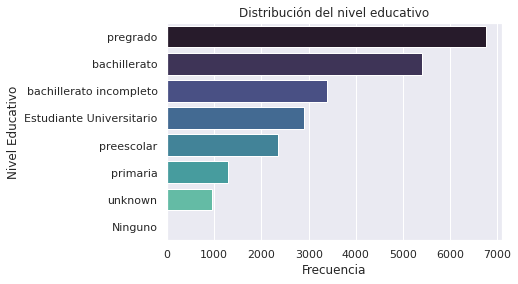

In [132]:
sns.countplot(data = train, y = 'educacion', palette = 'mako', 
              order = ['pregrado', 'bachillerato', 'bachillerato incompleto',
                  'Estudiante Universitario', 'preescolar', 'primaria',
                  'unknown', 'Ninguno'])
plt.ylabel('Nivel Educativo')
plt.xlabel('Frecuencia')
plt.title('Distribución del nivel educativo')

Text(0, 0.5, 'Porcentaje')

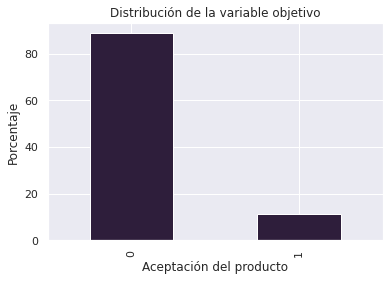

In [124]:
# Variable de respuesta desbalanceada, buscar métricas que examinen tp y tf, exactitud no será útil

(train['y'].value_counts(normalize = True)*100).plot(kind = 'bar')
plt.title('Distribución de la variable objetivo')
plt.xlabel('Aceptación del producto')
plt.ylabel('Porcentaje')

## Análisis bivariado

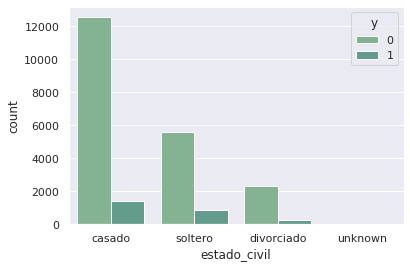

In [59]:
sns.countplot(data = train, x = 'estado_civil', hue = 'y', order = ['casado','soltero','divorciado','unknown'])

In [ ]:
train[['estado_civil','y']].value_counts(sort= False)

estado_civil  y
casado        0    12553
              1     1412
divorciado    0     2321
              1      279
soltero       0     5602
              1      893
unknown       0       33
              1        6
dtype: int64

In [ ]:
p_1_casado = 1412/(12553+1412)
p_1_divorciado = 279/ (2321+279)
p_1_soltero = 893 / (5602+893)

print(p_1_casado,p_1_divorciado,p_1_soltero)

0.10110991765127103 0.10730769230769231 0.13749037721324095


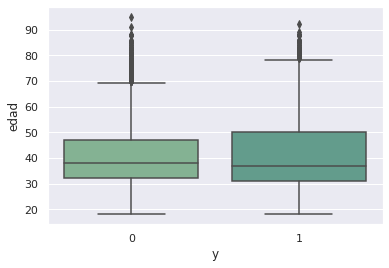

In [60]:
sns.boxplot(data = train, x = 'y',y = 'edad')

In [ ]:
train.groupby('y')['emp_var_rate'].median()

y
0    1.1
1   -1.8
Name: emp_var_rate, dtype: float64

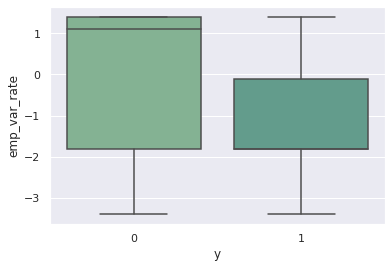

In [ ]:
sns.boxplot(data = train, x = 'y',y = 'emp_var_rate')

## Correlación

Se observa una fuerte correlación entre emp_var_rate, euiriobor, nr_employ y cons_price_idx. Para reducir la colinearidad se puede intentar crear uno o dos componentes principales a partir de estas 4 variables.

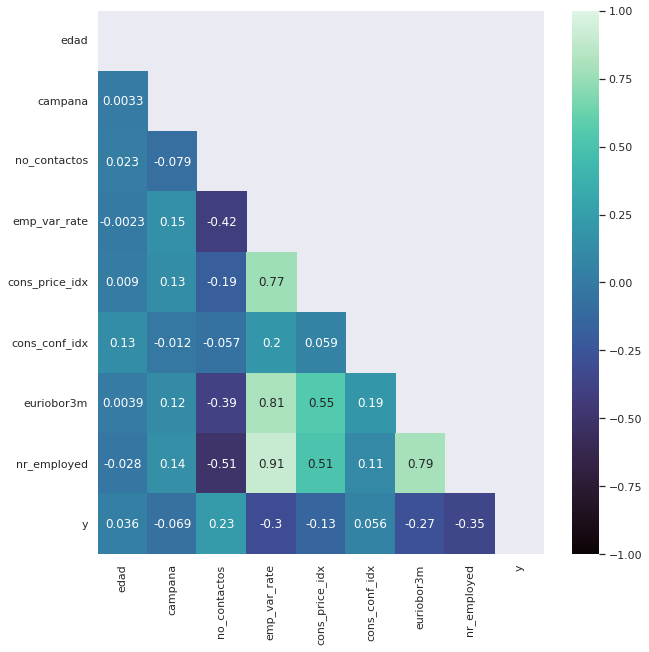

In [63]:
corr = train.corr()
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot = True, mask = mask, vmax=1,vmin = -1, center=0,cmap = 'mako')

## Procesamiento

1. Estandarizar variables cuantitativas usando StandardScaler
2. Estandarizar variables categóricas usando get_dummies

### Estandarización

In [ ]:
# train es el dataframe sin ningún tipo de procesamiento, solo limpieza
train1 = train.copy()

num_vars = train1.select_dtypes(['float64','int64']).drop(columns = 'y')
scaler = StandardScaler(with_mean=True,with_std=True)
train_standarize =  pd.DataFrame( scaler.fit_transform(num_vars), 
             columns = list(num_vars.columns))

for i in train_standarize.columns:
  train1[i] = train_standarize[i]

# train1.describe()
# train1.head()

### Codificación Dummy

In [ ]:
cat = list(train1.select_dtypes('category').columns)
# k dummies
train2 = pd.get_dummies(train1, columns = cat)
# k-1 dummies
train3 = pd.get_dummies(train1, columns = cat, drop_first=True)

print('Dimensiones con k dummies por variable: {}'.format(train2.shape))
print('Dimensiones con k-1 dummies por variable: {}'.format(train3.shape))

Dimensiones con k dummies por variable: (23099, 64)
Dimensiones con k-1 dummies por variable: (23099, 53)


### Partición train/validation/test

Entrenamiento 56%

Validación 14%

Prueba 30% 

El conjunto de validación se empleo para el tuneo de hiperparámetros, para lo cuál se empleo validación cruzada estratificada con 5 pliegues.

In [64]:
X = train2.drop(columns = 'y')
y = train2['y']

print('Dimensiones X y y de entrenamiento: {} / {}'.format(X.shape,y.shape))

Dimensiones X y y de entrenamiento: (23099, 63) / (23099,)


## Modelamiento

Para esta fase se crearon 3 modelos, empleando los siguientes algoritmos:
* Regresión logística
* Árbol de decisión
* Bosque aleatorio
También se crearon dos modelos de linea base para comparar las métricas obtenidas.

### Linea base



In [ ]:
train['y'].value_counts(normalize = False)

0    20509
1     2590
Name: y, dtype: int64

La exactitud del modelo inútil es: 0.887873933936534
El F1 del modelo inútil es: 0.0


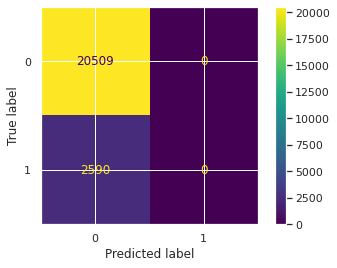

In [66]:
# Modelo inútil que siempre predice 1, clase mayoritaria
y_0 = np.zeros(y.shape[0])

cm = metrics.confusion_matrix(y, y_0)
matrix1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
print('La exactitud del modelo inútil es: {}'.format(metrics.accuracy_score(y,y_0)))
print('El F1 del modelo inútil es: {}'.format(metrics.f1_score(y,y_0)))
matrix1.plot();

La exactitud del modelo aleatorio es: 0.4982466773453396
El F1 del modelo aleatorio es: 0.18299732130269278


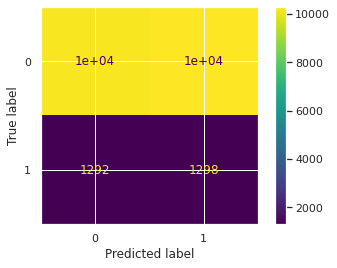

In [67]:
# Modelo aleatorio

y_random = random.choice([0, 1], size=y.shape)
cm = metrics.confusion_matrix(y, y_random)
matrix2 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
print('La exactitud del modelo aleatorio es: {}'.format(metrics.accuracy_score(y,y_random)))
print('El F1 del modelo aleatorio es: {}'.format(metrics.f1_score(y,y_random)))
matrix2.plot();

### Regresión logística

In [ ]:
# DOs modelos básicos, uno con regularización y otro con L2

logit = LogisticRegression(max_iter = 1000,penalty = 'none').fit(X,y)
coef_none = logit.coef_[0]

logit1 = LogisticRegression(max_iter = 1000).fit(X,y)
coef_l2 = logit1.coef_[0]

In [ ]:
# Cs control regularization strength
C_parameter = [1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000]

logit_cv = LogisticRegressionCV(cv=5,
                           max_iter=1000,
                           random_state=0, 
                           Cs = C_parameter,
                           scoring = 'f1',
                           verbose = 3).fit(X, y)
coef_cv = logit_cv.coef_[0]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.7s finished


              precision    recall  f1-score   support

           0       0.91      0.99      0.95     20509
           1       0.71      0.20      0.31      2590

    accuracy                           0.90     23099
   macro avg       0.81      0.59      0.63     23099
weighted avg       0.89      0.90      0.88     23099



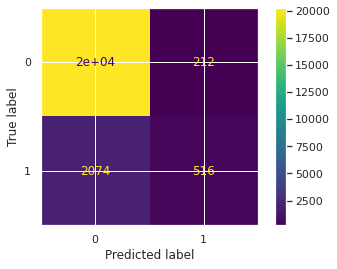

In [ ]:
y_pred_cv = logit_cv.predict(X)

cm_logit_cv = metrics.confusion_matrix(y, y_pred_cv)
matrix3 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_logit_cv)
print(metrics.classification_report(y,y_pred_cv))
matrix3.plot()

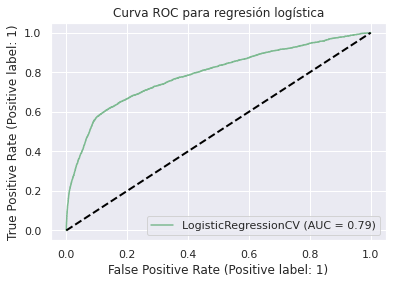

In [136]:
sns.set_palette('crest')
metrics.RocCurveDisplay.from_estimator(logit_cv, X, y)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random guess')
plt.title('Curva ROC para regresión logística')
plt.show();

Text(0.5, 1.0, 'Cross Validation L2')

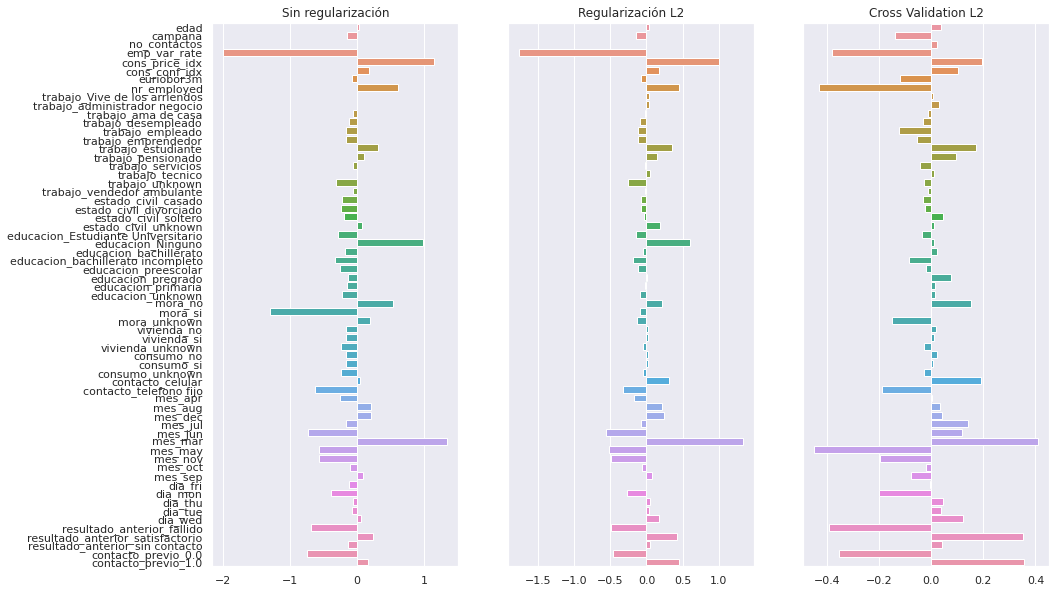

In [69]:
col = list(X.columns)

fig, ax = plt.subplots(1,3, figsize = (15,10), sharey = True, sharex = False)

sns.barplot(y = col, x = coef_none, ax = ax[0])
ax[0].set_title('Sin regularización')

sns.barplot(y = col, x = coef_l2,ax = ax[1])
ax[1].set_title('Regularización L2')

sns.barplot(y = col, x = coef_cv,ax = ax[2])
ax[2].set_title('Cross Validation L2')

Text(0, 0.5, 'Variable')

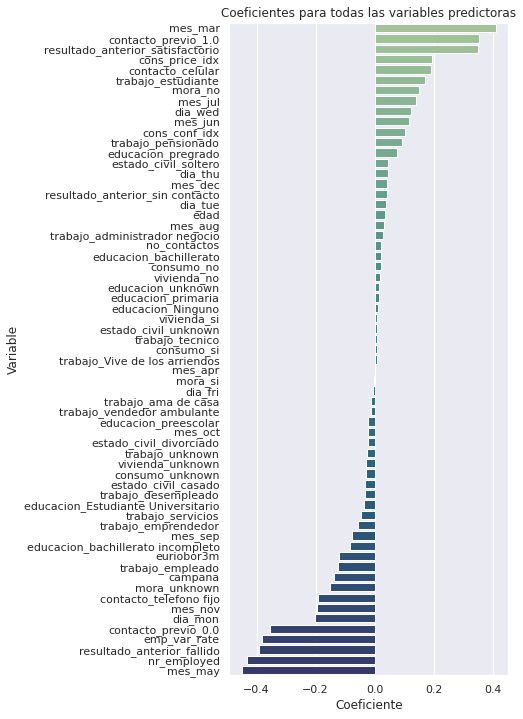

In [137]:
logit_results = pd.DataFrame({'col':col,'coef_cv':coef_cv})
logit_results = logit_results.sort_values(by= 'coef_cv', ascending = False)

fig = plt.figure(figsize = (5,12))
sns.barplot(data = logit_results,x = 'coef_cv',y = 'col', palette = 'crest')
plt.title('Coeficientes para todas las variables predictoras')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')

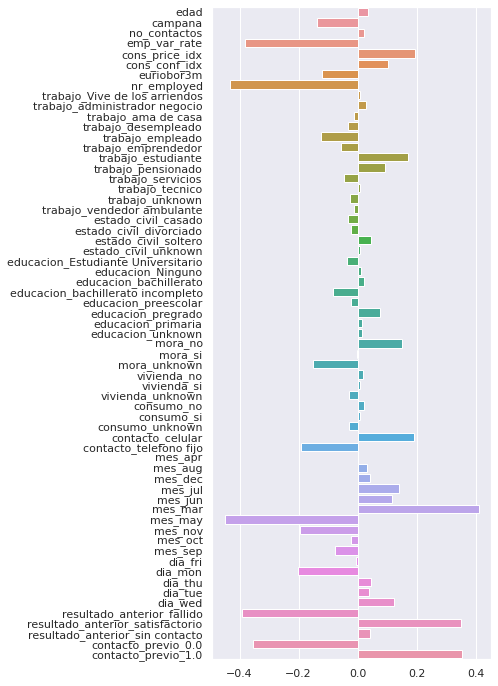

In [139]:
fig = plt.figure(figsize = (5,12))
sns.barplot(y = col, x = coef_cv)

### Árbol de decisión

In [ ]:
tree = DecisionTreeClassifier(random_state = 0)
params = {
    'max_depth' : range(1,20,1),
    'criterion' : ['gini','entropy'],
    'max_features':['sqrt','log2']
}

tree_grid = GridSearchCV(tree, param_grid= params, cv = 5, scoring = 'f1')
tree_grid.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'max_features': ['sqrt', 'log2']},
             scoring='f1')

In [71]:
print('Mejores hiperparámetros: ',tree_grid.best_params_)
print('Mejor F1-score: ', tree_grid.best_score_)

# Exportar resultados de la validación cruzada
cv_results_tree = pd.DataFrame(tree_grid.cv_results_)
cv_results_tree.to_csv('/content/drive/MyDrive/prueba_tecnica/cv_results_tree.csv')

Mejores hiperparámetros:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2'}
Mejor F1-score:  0.11296628975525273


Reporte de Clasificación del Árbol de Decisión
---------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     20509
           1       0.67      0.20      0.31      2590

    accuracy                           0.90     23099
   macro avg       0.79      0.59      0.63     23099
weighted avg       0.88      0.90      0.87     23099

Matriz de Confusión del Árbol de Decisión
---------------------------------------------


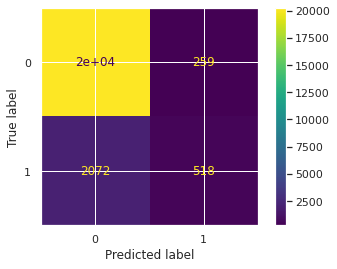

In [76]:
y_pred_tree = tree_grid.best_estimator_.predict(X)

cm_tree_cv = metrics.confusion_matrix(y, y_pred_tree)
matrix4 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_tree_cv)
matrix4.plot()

print('Reporte de Clasificación del Árbol de Decisión\n---------------------------------------------')
print(metrics.classification_report(y,y_pred_tree))
print('Matriz de Confusión del Árbol de Decisión\n---------------------------------------------')

Text(0.5, 1.0, 'Curva ROC para el árbol de decisión')

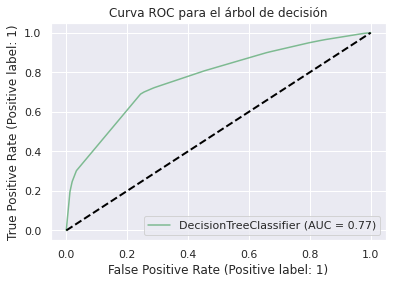

In [74]:
metrics.RocCurveDisplay.from_estimator(tree_grid.best_estimator_, X, y)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random guess')
plt.title('Curva ROC para el árbol de decisión')

Text(0, 0.5, 'Características')

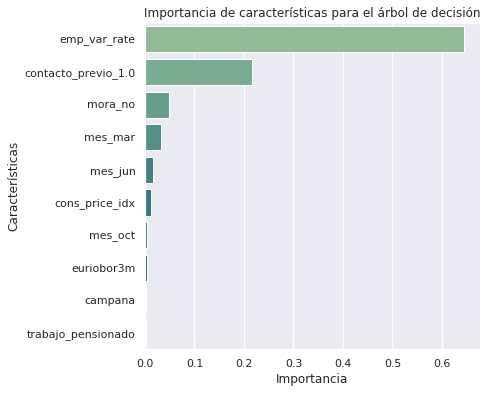

In [75]:
importance = tree_grid.best_estimator_.feature_importances_
features = list(X.columns)
tree_results = pd.DataFrame({'features':features,'importance':importance})
tree_results = tree_results.sort_values(by= 'importance', ascending = False).head(10)

fig = plt.figure(figsize = (6,6) )
sns.barplot(data = tree_results, x = 'importance', y = 'features', palette = 'crest')
plt.title('Importancia de características para el árbol de decisión')
plt.xlabel('Importancia')
plt.ylabel('Características')

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(tree_grid.best_estimator_, out_file="tree.dot",impurity=True, filled=True,class_names=['no','si'],feature_names=list(X.columns))

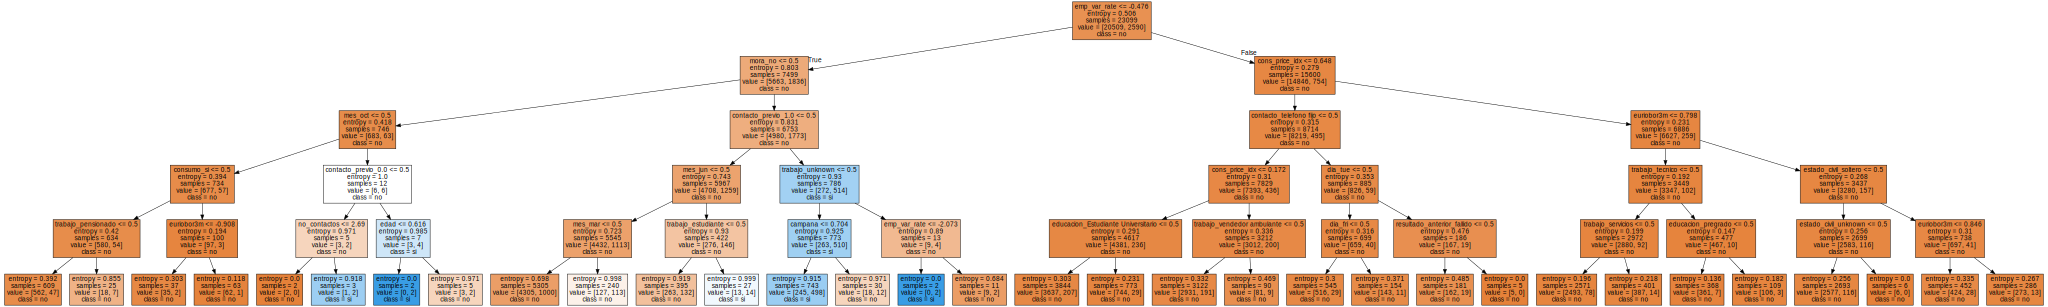

In [ ]:
import graphviz

with open("tree.dot") as f:dot_graph = f.read()
display(graphviz.Source(dot_graph))  


### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state = 0)
params = {
    'n_estimators': [100,500,1000],
    'max_depth' : range(1,16,2),
    'criterion' : ['gini','entropy'],
    'max_features':['sqrt','log2']
}

rf_grid = GridSearchCV(rf, param_grid= params, cv = 5, scoring = 'f1')
%time rf_grid.fit(X, y)

CPU times: user 36min 44s, sys: 4.63 s, total: 36min 49s
Wall time: 36min 50s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 16, 2),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 500, 1000]},
             scoring='f1')

In [82]:
cv_results_rf = pd.DataFrame(rf_grid.cv_results_)
cv_results_rf.to_csv('/content/drive/MyDrive/prueba_tecnica/cv_results_rf.csv')

print('Mejores hiperparámetros: ', rf_grid.best_params_)
print('Mejor F1-score: ',rf_grid.best_score_)

Mejores hiperparámetros:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 500}
Mejor F1-score:  0.07927631578947367


Reporte de Clasificación del Bosque Aleatorion
---------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     20509
           1       0.67      0.20      0.31      2590

    accuracy                           0.90     23099
   macro avg       0.79      0.59      0.63     23099
weighted avg       0.88      0.90      0.87     23099

Matriz de Confusión del Bosque Aleatorio
---------------------------------------------


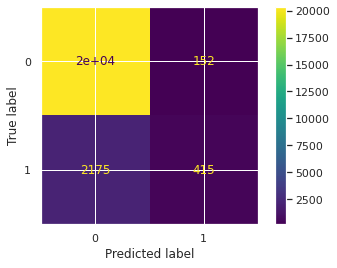

In [78]:
y_pred_rf = rf_grid.best_estimator_.predict(X)

cm_rf_cv = metrics.confusion_matrix(y, y_pred_rf)
matrix5 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_rf_cv)
matrix5.plot()


print('Reporte de Clasificación del Bosque Aleatorio\n---------------------------------------------')
print(metrics.classification_report(y,y_pred_tree))
print('Matriz de Confusión del Bosque Aleatorio\n---------------------------------------------')

Text(0.5, 1.0, 'Curva ROC para el Bosque Aleatorio')

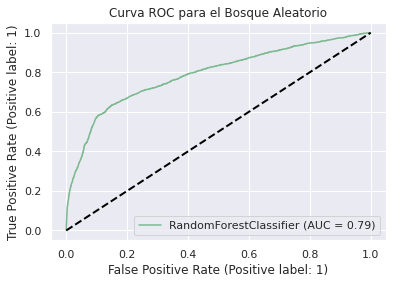

In [79]:
metrics.RocCurveDisplay.from_estimator(rf_grid.best_estimator_, X, y)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random guess')
plt.title('Curva ROC para el Bosque Aleatorio')

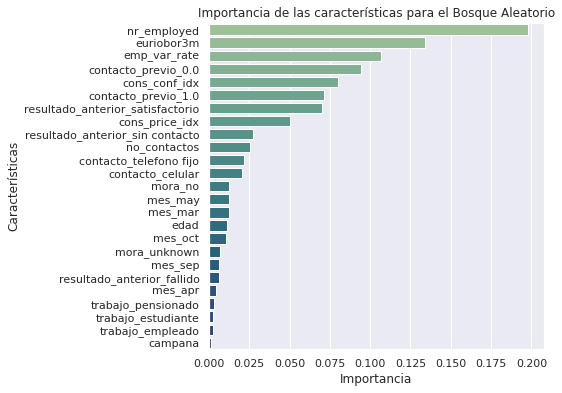

In [85]:
importance = rf_grid.best_estimator_.feature_importances_
features = list(X.columns)
tree_results = pd.DataFrame({'features':features,'importance':importance})
tree_results = tree_results.sort_values(by= 'importance', ascending = False).head(25)

fig = plt.figure(figsize = (6,6) )
sns.barplot(data = tree_results, x = 'importance', y = 'features', palette = 'crest')

plt.title('Importancia de las características para el Bosque Aleatorio')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.savefig('/content/drive/MyDrive/prueba_tecnica/rf_feature_importance.png',dpi = 50,bbox_inches = 'tight')

## Comparación de los 3 modelos

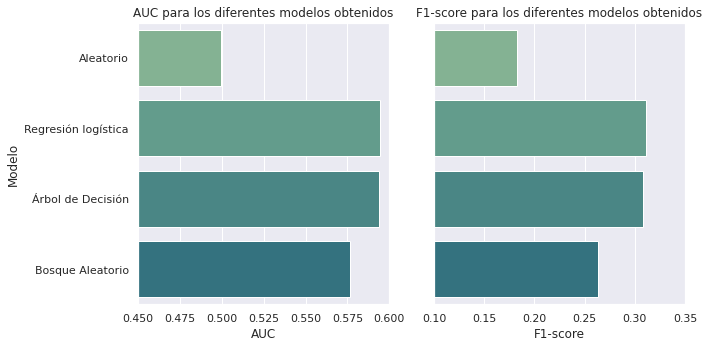

In [108]:
auc_aleatorio  = metrics.roc_auc_score(y,y_random)
auc_logit = metrics.roc_auc_score(y,y_pred_cv)
auc_tree  = metrics.roc_auc_score(y,y_pred_tree)
auc_rf = metrics.roc_auc_score(y,y_pred_rf)

f1_aleatorio  = metrics.f1_score(y,y_random)
f1_logit = metrics.f1_score(y,y_pred_cv)
f1_tree  = metrics.f1_score(y,y_pred_tree)
f1_rf = metrics.f1_score(y,y_pred_rf)

modelos = ['Aleatorio','Regresión logística', 'Árbol de Decisión','Bosque Aleatorio']
aucs = [auc_aleatorio,auc_logit,auc_tree,auc_rf]
f1s = [f1_aleatorio,f1_logit,f1_tree,f1_rf]

fig, ax = plt.subplots(1,2, figsize = (10,5), sharey = True)
sns.barplot(x = aucs,y = modelos,ax = ax[0])
ax[0].set_xlim(0.45,0.6)
ax[0].set_xlabel('AUC')
ax[0].set_ylabel('Modelo')
ax[0].set_title('AUC para los diferentes modelos obtenidos')

sns.barplot(x = f1s,y = modelos,ax = ax[1])
ax[1].set_xlim(0.1,0.35)
ax[1].set_xlabel('F1-score')

ax[1].set_title('F1-score para los diferentes modelos obtenidos')
plt.tight_layout()

## Aplicación del mejor modelo analítico

Lectura y limpieza

In [208]:
test = pd.read_csv('https://github.com/HarryVargas96/Bank-product-opening/blob/main/test.csv?raw=true').drop(columns = ['ID'])

# Definición nombres de variables
nombres = ['edad','trabajo','estado_civil','educacion','mora','vivienda','consumo','contacto','mes','dia','campana','dias_ultima_camp','no_contactos','resultado_anterior','emp_var_rate','cons_price_idx','cons_conf_idx','euriobor3m','nr_employed']
test.columns = nombres

# Definición de columnas tipo categories
test = test.astype( dtype = {'trabajo':'category','estado_civil':'category','educacion':'category','mora':'category','vivienda':'category','consumo':'category','contacto':'category','mes':'category','dia':'category','resultado_anterior':'category'})

test['estado_civil'] = test['estado_civil'].map(lambda x: 'divorciado' if x == 'divorced' else x).astype('category')
test['estado_civil'] = test['estado_civil'].map(lambda x: 'soltero' if x == 'single' else x).astype('category')

test['contacto_previo'] =  test['dias_ultima_camp'].map(lambda x: 0.0 if x == 999 else 1.0).astype('category')
test.drop(columns = 'dias_ultima_camp',inplace = True)

test.loc[test['cons_price_idx'] == 93.2,'cons_price_idx'] = 93200

Transformación de variables

In [209]:
test1 = test.copy()

num_vars = test1.select_dtypes(['float64','int64'])
test_standarize =  pd.DataFrame( scaler.transform(num_vars), 
             columns = list(num_vars.columns))

for i in test_standarize.columns:
  test1[i] = test_standarize[i]

test2 = pd.get_dummies(test1, columns = cat)
test2['mora_si'] = 0.0
test2 = test2[list(X.columns)]

Predicciones

In [212]:
test3 = test2.copy()
test3['prediccion'] = logit_cv.predict(test2)

test3.to_csv('test_processed.csv')
X.to_csv('train_processed.csv')

Se genera un archivo con los datos de prueba organizados por probabilidad de adquirir el producto.

In [207]:
test3['probabilidad'] = pd.DataFrame(logit_cv.predict_proba(test2))[0]
test3.sort_values(by= 'probabilidad', ascending = False).to_csv('lista_ordenada_de_clientes.csv')